In [39]:
from sklearn.metrics import roc_curve, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

# ex : 데이터의 편향을 크게 잡아서 예측과 평가를 해보자
# survived = 1 의 수를 5% 줄인 결과를 예측해보자
# 편향이 있는 데이터의 경우 일반데이터에 비해 정답률이 ROC 곡선보다 PR이 활성화 된다.

In [48]:
# 1단계) 전처리 하자
df = sns.load_dataset('titanic')
df.head()

drop_list = ['deck', 'alive']
df = df.drop(drop_list, axis=1)
df = df.dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [49]:
# 2단계) survived = 1의 변수를 제거하고 그 중에서 5%를 무작위로 샘플링하자
res = df[df['survived'] == 1]
res = res.sample(frac = 0.05, random_state=0)

In [50]:
# 3단계) res 데이터에 데이터세트에서 추출한 사망자의 데이터를 결합하자
res02 = df[df['survived'] == 0]
df = pd.concat([res, res02])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
209,1,1,male,40.0,0,0,31.0000,C,First,man,True,Cherbourg,True
569,1,3,male,32.0,0,0,7.8542,S,Third,man,True,Southampton,True
315,1,3,female,26.0,0,0,7.8542,S,Third,woman,False,Southampton,True
641,1,1,female,24.0,0,0,69.3000,C,First,woman,False,Cherbourg,True
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True


In [51]:
# 4단계) 더미변수
X = pd.get_dummies(df.drop('survived', axis=1))
Y = df['survived']

# 대상 데이터 확인
pd.Series.value_counts(Y)  # 사망자 424명, 생존자 14명

0    424
1     14
Name: survived, dtype: int64

In [52]:
# 5단계) 머신러닝을 구현하자

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
ir = LogisticRegression(max_iter = 1000, random_state=0)  # 1000번을 반복해서 판정을 한다.
ir.fit(X_train, Y_train)  # 학습을 한다

# 4. 학습 데이터 판정 결과(예측치)를 test 데이터로 확인하자
y_pred = ir.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
print('confusion_matrix = \n', confusion_matrix(Y_test, y_pred))
print('accuracy =', accuracy_score(Y_test, y_pred))
print('precision =', precision_score(Y_test, y_pred))
print('recall =', recall_score(Y_test, y_pred))
print('fi score =', f1_score(Y_test, y_pred))

confusion_matrix = 
 [[211   0]
 [  7   1]]
accuracy = 0.9680365296803652
precision = 1.0
recall = 0.125
fi score = 0.2222222222222222


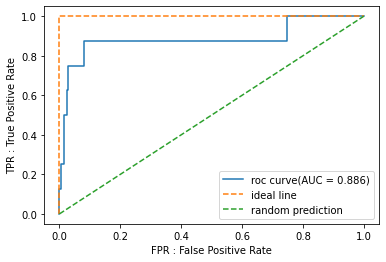

In [55]:
# 그래프 확인
Y_score = ir.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr, label='roc curve(AUC = %.3f)'% auc(fpr, tpr))
plt.plot([0,0,1],[0,1,1], linestyle='--', label='ideal line')
plt.plot([0,1],[0,1], linestyle='--', label='random prediction')
plt.legend()
plt.xlabel('FPR : False Positive Rate')
plt.ylabel('TPR : True Positive Rate')
plt.show()

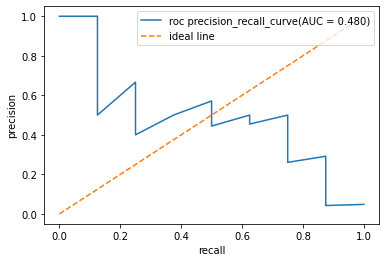

In [56]:
# 번외4) PR 곡선
probas_pred = ir.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas_pred)

plt.plot(recall, precision, label='roc precision_recall_curve(AUC = %.3f)'% auc(recall, precision))
plt.plot([0,1],[0,1], linestyle='--', label='ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()